In [1]:
paro=spark.read.csv("paro/",sep=";",header=True,
                    encoding="cp1252",inferSchema=True)

In [2]:
paro.show(vertical=True)

-RECORD 0----------------------------------------
 Código mes               | 201801               
 mes                      | Enero de 2018        
 Código de CA             | 1                    
 Comunidad Autónoma       | Andalucía            
 Codigo Provincia         | 4                    
 Provincia                | Almería              
 Codigo Municipio         | 4001                 
  Municipio               | Abla                 
 total Paro Registrado    | 77                   
 Paro hombre edad < 25    | 3                    
 Paro hombre edad 25 -45  | 17                   
 Paro hombre edad >=45    | 25                   
 Paro mujer edad < 25     | 4                    
 Paro mujer edad 25 -45   | 20                   
 Paro mujer edad >=45     | 8                    
 Paro Agricultura         | 11                   
 Paro Industria           | 8                    
 Paro Construcción        | 7                    
 Paro Servicios           | 50                   


In [3]:
paro.printSchema()

root
 |-- Código mes : integer (nullable = true)
 |-- mes: string (nullable = true)
 |-- Código de CA: integer (nullable = true)
 |-- Comunidad Autónoma: string (nullable = true)
 |-- Codigo Provincia: integer (nullable = true)
 |-- Provincia: string (nullable = true)
 |-- Codigo Municipio: integer (nullable = true)
 |--  Municipio: string (nullable = true)
 |-- total Paro Registrado: integer (nullable = true)
 |-- Paro hombre edad < 25: integer (nullable = true)
 |-- Paro hombre edad 25 -45 : integer (nullable = true)
 |-- Paro hombre edad >=45: integer (nullable = true)
 |-- Paro mujer edad < 25: integer (nullable = true)
 |-- Paro mujer edad 25 -45 : integer (nullable = true)
 |-- Paro mujer edad >=45: integer (nullable = true)
 |-- Paro Agricultura: integer (nullable = true)
 |-- Paro Industria: integer (nullable = true)
 |-- Paro Construcción: integer (nullable = true)
 |-- Paro Servicios: integer (nullable = true)
 |-- Paro Sin empleo Anterior: integer (nullable = true)



In [4]:
paro.columns

['Código mes ',
 'mes',
 'Código de CA',
 'Comunidad Autónoma',
 'Codigo Provincia',
 'Provincia',
 'Codigo Municipio',
 ' Municipio',
 'total Paro Registrado',
 'Paro hombre edad < 25',
 'Paro hombre edad 25 -45 ',
 'Paro hombre edad >=45',
 'Paro mujer edad < 25',
 'Paro mujer edad 25 -45 ',
 'Paro mujer edad >=45',
 'Paro Agricultura',
 'Paro Industria',
 'Paro Construcción',
 'Paro Servicios',
 'Paro Sin empleo Anterior']

In [5]:
paro2=paro.drop('mes',
 'Código de CA','Codigo Provincia','Codigo Municipio')

In [6]:
paro2.show()

+-----------+------------------+---------+--------------------+---------------------+---------------------+------------------------+---------------------+--------------------+-----------------------+--------------------+----------------+--------------+-----------------+--------------+------------------------+
|Código mes |Comunidad Autónoma|Provincia|           Municipio|total Paro Registrado|Paro hombre edad < 25|Paro hombre edad 25 -45 |Paro hombre edad >=45|Paro mujer edad < 25|Paro mujer edad 25 -45 |Paro mujer edad >=45|Paro Agricultura|Paro Industria|Paro Construcción|Paro Servicios|Paro Sin empleo Anterior|
+-----------+------------------+---------+--------------------+---------------------+---------------------+------------------------+---------------------+--------------------+-----------------------+--------------------+----------------+--------------+-----------------+--------------+------------------------+
|     201801|         Andalucía|  Almería|                Abla|    

In [7]:
paro2.printSchema()

root
 |-- Código mes : integer (nullable = true)
 |-- Comunidad Autónoma: string (nullable = true)
 |-- Provincia: string (nullable = true)
 |--  Municipio: string (nullable = true)
 |-- total Paro Registrado: integer (nullable = true)
 |-- Paro hombre edad < 25: integer (nullable = true)
 |-- Paro hombre edad 25 -45 : integer (nullable = true)
 |-- Paro hombre edad >=45: integer (nullable = true)
 |-- Paro mujer edad < 25: integer (nullable = true)
 |-- Paro mujer edad 25 -45 : integer (nullable = true)
 |-- Paro mujer edad >=45: integer (nullable = true)
 |-- Paro Agricultura: integer (nullable = true)
 |-- Paro Industria: integer (nullable = true)
 |-- Paro Construcción: integer (nullable = true)
 |-- Paro Servicios: integer (nullable = true)
 |-- Paro Sin empleo Anterior: integer (nullable = true)



In [8]:
paro2.select('Código mes ',' Municipio','total Paro Registrado')\
    .where(paro2[' Municipio'].contains("Porriño"))\
    .where(paro2['Código mes ']==201808).show()

+-----------+----------+---------------------+
|Código mes | Municipio|total Paro Registrado|
+-----------+----------+---------------------+
|     201808|Porriño, O|                 1473|
+-----------+----------+---------------------+



In [9]:
paro2.select('Código mes ',' Municipio','total Paro Registrado')\
    .where(paro2[' Municipio'].contains("Porriño") & 
           (paro2['Código mes ']==201808)).show()

+-----------+----------+---------------------+
|Código mes | Municipio|total Paro Registrado|
+-----------+----------+---------------------+
|     201808|Porriño, O|                 1473|
+-----------+----------+---------------------+



In [10]:
paroPandas=paro2.select('Código mes ',' Municipio','total Paro Registrado')\
    .where(paro2[' Municipio'].contains("Porriño")).toPandas()

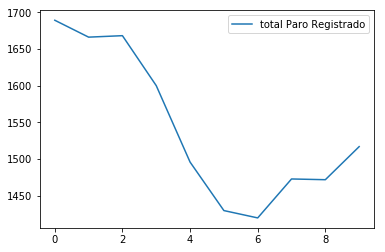

In [18]:
paroPandas.plot.line(y='total Paro Registrado')

In [12]:
paro2.columns

['Código mes ',
 'Comunidad Autónoma',
 'Provincia',
 ' Municipio',
 'total Paro Registrado',
 'Paro hombre edad < 25',
 'Paro hombre edad 25 -45 ',
 'Paro hombre edad >=45',
 'Paro mujer edad < 25',
 'Paro mujer edad 25 -45 ',
 'Paro mujer edad >=45',
 'Paro Agricultura',
 'Paro Industria',
 'Paro Construcción',
 'Paro Servicios',
 'Paro Sin empleo Anterior']

In [19]:
agostoCCAA=paro2.where(paro2['Código mes ']==201808)\
    .groupBy('Comunidad Autónoma').sum('total Paro Registrado')\
    .orderBy("sum(total Paro Registrado)",ascending=False)\
    .withColumnRenamed("sum(total Paro Registrado)","Total")
agostoCCAA.show(n=2)

+------------------+------+
|Comunidad Autónoma| Total|
+------------------+------+
|         Andalucía|792577|
|          Cataluña|380718|
+------------------+------+
only showing top 2 rows



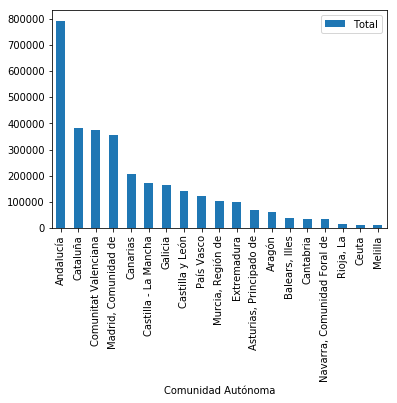

In [20]:
CCAAP=agostoCCAA.toPandas()
CCAAP.plot.bar(x="Comunidad Autónoma")

In [15]:
agostoCCAA.columns

['Comunidad Autónoma', 'Total']

In [21]:
agostoCCAA=paro2.where(paro2['Código mes ']==201808)\
    .groupBy('Comunidad Autónoma').sum()

In [22]:
porSeparado=agostoCCAA.withColumn("hombres",
 agostoCCAA['sum(Paro hombre edad < 25)']+
 agostoCCAA['sum(Paro hombre edad 25 -45 )']+
 agostoCCAA['sum(Paro hombre edad >=45)'])\
.withColumn("mujeres",
 agostoCCAA['sum(Paro mujer edad < 25)']+
 agostoCCAA['sum(Paro mujer edad 25 -45 )']+
 agostoCCAA['sum(Paro mujer edad >=45)'])

porSeparado.printSchema(),
porSeparado.select("Comunidad Autónoma",
                   "hombres","mujeres").show()

root
 |-- Comunidad Autónoma: string (nullable = true)
 |-- sum(Código mes ): long (nullable = true)
 |-- sum(total Paro Registrado): long (nullable = true)
 |-- sum(Paro hombre edad < 25): long (nullable = true)
 |-- sum(Paro hombre edad 25 -45 ): long (nullable = true)
 |-- sum(Paro hombre edad >=45): long (nullable = true)
 |-- sum(Paro mujer edad < 25): long (nullable = true)
 |-- sum(Paro mujer edad 25 -45 ): long (nullable = true)
 |-- sum(Paro mujer edad >=45): long (nullable = true)
 |-- sum(Paro Agricultura): long (nullable = true)
 |-- sum(Paro Industria): long (nullable = true)
 |-- sum(Paro Construcción): long (nullable = true)
 |-- sum(Paro Servicios): long (nullable = true)
 |-- sum(Paro Sin empleo Anterior): long (nullable = true)
 |-- hombres: long (nullable = true)
 |-- mujeres: long (nullable = true)

+--------------------+-------+-------+
|  Comunidad Autónoma|hombres|mujeres|
+--------------------+-------+-------+
|              Aragón|  24711|  37759|
|Comunitat Va